In [1]:
import pandas as pd
flights = pd.read_csv("flights.csv",parse_dates=[0, 1])

In [2]:
def myzip(df):
    return df.drop_duplicates(['fetch_time'])

flights['d_time_date'] = flights.d_time.dt.date
flights['fetch_time_date'] = flights.fetch_time.dt.date
df = flights.groupby(flights.d_time_date).apply(myzip)    # 按出发日期分组。对分组按抓取时间去重

def fetch_num(df):
    s = pd.Series([0,0,0,0,0,0,0,0,0,0],index = ['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9'])
    for x in df.fetch_time.dt.date:
        d = (df.d_time_date.values[0] - x).days
        if d <= 9:
            s[d] = s[d] + 1
        else:
            continue
    return s

data_review = df.groupby(df.d_time_date).apply(fetch_num)  # 获得出发日期之前10天的数据概览   
data_review

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9
d_time_date,,,,,,,,,,
2020-09-22,3,0,0,0,0,0,0,0,0,0
2020-09-23,5,5,0,0,0,0,0,0,0,0
2020-09-24,3,5,5,0,0,0,0,0,0,0
2020-09-25,2,5,5,5,0,0,0,0,0,0
2020-09-26,1,3,5,2,4,0,0,0,0,0
2020-09-27,1,1,3,4,2,5,0,0,0,0
2020-09-28,3,1,1,3,4,2,4,0,0,0
2020-09-29,1,3,1,1,3,4,2,4,0,0
2020-09-30,2,2,3,1,1,3,3,2,4,0


In [3]:
def prices(df):
    s = pd.Series([0,0,0,0,0,0,0,0,0,0,df.flight_number.values[0],df.craft_type.values[0]],index = ['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9','flight_number','craft_type'])
    c = df.price.groupby(df.fetch_time_date).min()    # 一天内有多次查询，选最低价
    for x in c.index:
        diff = (df.d_time_date.values[0] - x).days
        if diff <= 9:
            s[diff] = c[x]
        else:
            continue
    return s

flight_prices = flights.groupby(flights.d_time).apply(prices)  # 生成每个航班的票价查询历史

flight_prices['d_day'] = flight_prices.index.to_series().dt.date
flight_prices['d_hour'] = flight_prices.index.to_series().dt.hour
flight_prices = flight_prices.reset_index(drop = True)
print(flight_prices)

       d0    d1  d2  d3  d4  d5  d6  d7  d8  d9 flight_number craft_type  \
0    2000     0   0   0   0   0   0   0   0   0        CZ6910      波音787   
1    2000     0   0   0   0   0   0   0   0   0        CA1295      波音737   
2    2230     0   0   0   0   0   0   0   0   0        CZ6912      波音738   
3       0  1690   0   0   0   0   0   0   0   0        CA1293      波音737   
4       0  1640   0   0   0   0   0   0   0   0        CZ6931      空客321   
..    ...   ...  ..  ..  ..  ..  ..  ..  ..  ..           ...        ...   
734     0     0   0   0   0   0   0   0   0   0        CZ6902      空客321   
735     0     0   0   0   0   0   0   0   0   0        CZ6908      波音738   
736     0     0   0   0   0   0   0   0   0   0        CZ6906      波音738   
737     0     0   0   0   0   0   0   0   0   0        CZ6910      波音787   
738     0     0   0   0   0   0   0   0   0   0        CA1295      波音738   

          d_day  d_hour  
0    2020-09-22      19  
1    2020-09-22      20  
2    2020

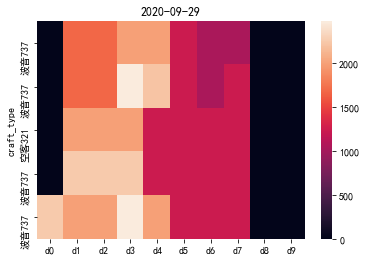

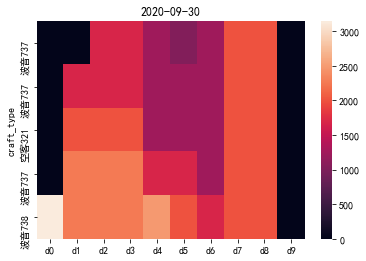

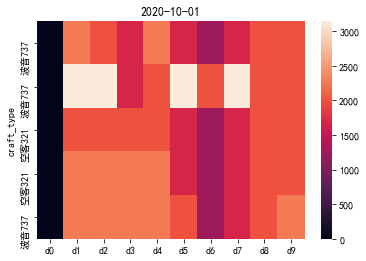

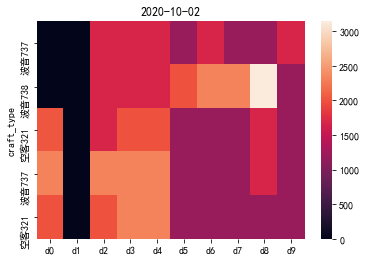

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import datetime

begin = datetime.date(2020,9,29)
end = datetime.date(2020,10,2)
for i in range((end-begin).days + 1):
    d = begin + datetime.timedelta(days=i) 

    df = flight_prices.loc[flight_prices.d_day == d]
    df = df.loc[df.flight_number.apply(lambda x: 'CA' in x)]
    df = df.sort_values(by='d_hour',ascending=True)
    df = df.set_index(['craft_type'])
    df = df.drop(labels= ['d_day','d_hour','flight_number'], axis = 1) 

    #print(df)
    import seaborn as sns
    import matplotlib.pyplot as plt
    ax = plt.axes()
    sns.heatmap(df.astype(float),ax=ax)  #heatmap需要df的数据为float类型
    ax.set_title(str(d))
    plt.show()

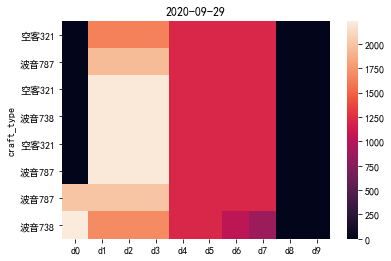

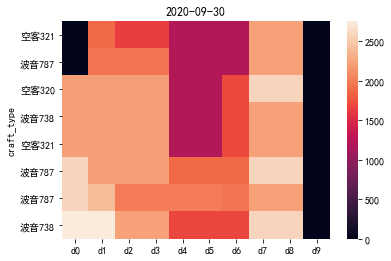

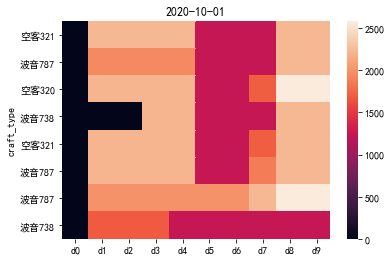

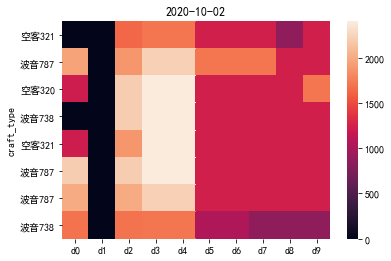

In [7]:
begin = datetime.date(2020,9,29)
end = datetime.date(2020,10,2)
for i in range((end-begin).days + 1):
    d = begin + datetime.timedelta(days=i) 

    df = flight_prices.loc[flight_prices.d_day == d]
    df = df.loc[df.flight_number.apply(lambda x: 'CZ' in x)]
    df = df.sort_values(by='d_hour',ascending=True)
    df = df.set_index(['craft_type'])
    df = df.drop(labels= ['d_day','d_hour','flight_number'], axis = 1) 

    #print(df)
    import seaborn as sns
    import matplotlib.pyplot as plt
    ax = plt.axes()
    sns.heatmap(df.astype(float),ax=ax)  #heatmap需要df的数据为float类型
    ax.set_title(str(d))
    plt.show()